# Titanic: Machine Learning from Disaster
### 타이타닉 생존자 예측하기
- 문제 정의
- 데이터 가져오기
- 데이터 둘러보기
- 특성 공학(특성 제어)
- 모델링
- 테스팅

## 1.문제정의
어떤 부류(종류)의 사람들이 생존할 가능성이 있는지 분석하기.  
특히, 타이타닉 비극에서 살아남은 승객을 예측하기 위해 기계학습 도구를 적용해 보라.

In [16]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

## 2. 데이터 가져오기

훈련 데이터셋 및 테스트 데이터는 Kaggle에서 다운로드할 수 있습니다.
다음의 링크에서도 다운로드 가능합니다. [https://github.com/minsuk-heo/kaggle-titanic/tree/master](https://github.com/minsuk-heo/kaggle-titanic)  
캐글주소는 다음과 같습니다. [https://www.kaggle.com/c/titanic/data]

### load train, test dataset using Pandas

In [17]:
#판다스 라이브러리를 사용하여 csv 파일을 읽음 구분자는 ","
import pandas as pd
train = pd.read_csv('input/train.csv',sep=',')
test = pd.read_csv('input/test.csv',sep=',')

## 3. 데이터 둘러보기

In [18]:
train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male   NaN      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
12                      Saundercock, Mr. William Henry    male  20.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                                Rice, Master. Eugene    male   2.0      4   
17                        Williams, Mr. Charles Eugene    male   NaN      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                             Masselmani, Mrs. Fatima  female   NaN

In [19]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### 데이터 구조
- Survived(생존여부): 	0 = No, 1 = Yes
- pclass(좌석등급): 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  	
- sibsp(타이타닉에 탑승한 형제or배우자 수):	# of siblings / spouses aboard the Titanic  	
- parch(타이타닉에 탑승한 부모 또는 아이수):	# of parents / children aboard the Titanic  	
- ticket(티켓번호):	Ticket number	
- cabin(선실번호):	Cabin number	
- embarked(승선항):	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  

age: 나이가1보다 작은경우 분수이며,만약 나이가 확실하지않고 추정치이면 xx.5로 표시됨

sibsp: 형제, 자매, 의붓형제,의붓자매
Spouse : 남편, 아내(약혼자는 무시)

parch: 가족관계를 정의하길 부모(엄마, 아빠), 자식(딸, 아들, 의붓딸, 의붓아들)
유모와 함께 여행한 아이들이 있기에 parch=0인 아이들이 있음

In [20]:
train.shape

(891, 12)

**Total rows and columns**

전체 데이터 크기는 891 행 by 12 컬럼으로 이루어져있는 훈련 데이터셋임

In [21]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [22]:
test.shape

(418, 11)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


### NaN 데이터 보기
*Age* 데이터의 값이 NaN으로 비어있는 것을 확인할 수 있다.

*Age*의 경우 891 개 중 714개만 값이 채워져있다.

*Cabin*의 경우에는 값이 상당히 많이 비어있다.891개 중 단지 204개만 값이 있다.
아래의 코드는 NaN값을 확인하는 코드이다.

In [25]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
!install pip3 seaborn

### 파이썬 시각화

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

### Bar Chart for Categorical Features
- Pclass
- Sex
- SibSp ( # of siblings and spouse)
- Parch ( # of parents and children)
- Embarked
- Cabin

In [29]:
def bar_chart(feature):
    #생존한 사람들의 수를 구하는데 feature라는 고려사항이 들어감
    survived = train[train['Survived']==1][feature].value_counts()
    #생존하지 못한 사람들의 수
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

In [30]:
train[train['Survived']==1]

PassengerId  Survived  Pclass  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
15            16         1       2   
17            18         1       2   
19            20         1       3   
21            22         1       2   
22            23         1       3   
23            24         1       1   
25            26         1       3   
28            29         1       3   
31            32         1       1   
32            33         1       3   
36            37         1       3   
39            40         1       3   
43            44         1       2   
44            45         1       3   
47            48         1       3   
52            53         1       1   
53            54         1       2   
55            56         1       1   
56            57         1       2   
58            59         1       2   
61            62         1       1   
65            66         1       3   
66            67         1       2   
..           ...       ...     ...   
809          810         1       1   
820          821         1       1   
821          822         1       3   
823          824         1       3   
827          828         1       2   
828          829         1       3   
829          830         1       1   
830          831         1       3   
831          832         1       2   
835          836         1       1   
838          839         1       3   
839          840         1       1   
842          843         1       1   
849          850         1       1   
853          854         1       1   
855          856         1       3   
856          857         1       1   
857          858         1       1   
858          859         1       3   
862          863         1       1   
865          866         1       2   
866          867         1       2   
869          870         1       3   
871          872         1       1   
874          875         1       2   
875          876         1       3   
879          880         1       1   
880          881         1       2   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex    Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.00      1   
2                               Heikkinen, Miss. Laina  female  26.00      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.00      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.00      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.00      1   
11                            Bonnell, Miss. Elizabeth  female  58.00      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.00      0   
17                        Williams, Mr. Charles Eugene    male    NaN      0   
19                             Masselmani, Mrs. Fatima  female    NaN      0   
21                               Beesley, Mr. Lawrence    male  34.00      0   
22                         McGowan, Miss. Anna "Annie"  female  15.00      0   
23                        Sloper, Mr. William Thompson    male  28.00      0   
25   Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.00      1   
28                       O'Dwyer, Miss. Ellen "Nellie"  female    NaN      0   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female    NaN      1   
32                            Glynn, Miss. Mary Agatha  female    NaN      0   
36                                    Mamee, Mr. Hanna    male    NaN      0   
39                         Nicola-Yarred, Miss. Jamila  female  14.00      1   
43            Laroche, Miss. Simonne Marie Anne 

In [31]:
train[train['Survived']==1]['Sex']

1      female
2      female
3      female
8      female
9      female
10     female
11     female
15     female
17       male
19     female
21       male
22     female
23       male
25     female
28     female
31     female
32     female
36       male
39     female
43     female
44     female
47     female
52     female
53     female
55       male
56     female
58     female
61     female
65       male
66     female
        ...  
809    female
820    female
821      male
823    female
827      male
828      male
829    female
830    female
831      male
835    female
838      male
839      male
842    female
849    female
853    female
855    female
856    female
857      male
858    female
862    female
865    female
866    female
869      male
871    female
874    female
875    female
879    female
880    female
887    female
889      male
Name: Sex, Length: 342, dtype: object

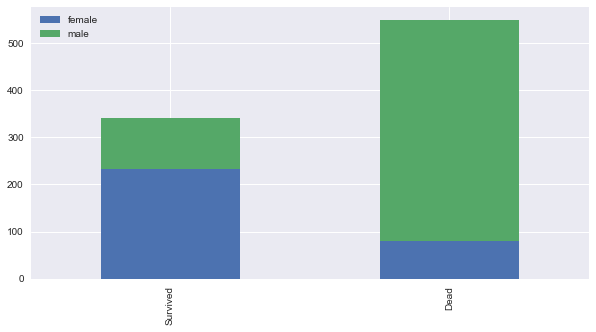

In [32]:
bar_chart('Sex')

위의 차트를 보면 남성보다는 __여성이 생존할 가능성이 더 높다__.

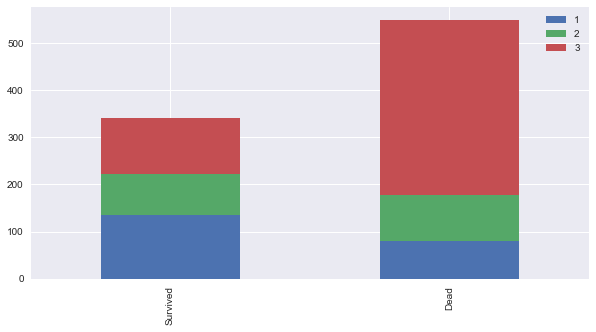

In [33]:
bar_chart('Pclass')

* 위의 좌측 차트를 보면 __1등석에 탑승한 사람들이 생존할 가능성이 더 높다__. 
* 위의 우측 차트를 보면 __3등석에 탑승한 사람들이 죽을 가능성이 더 높다__.

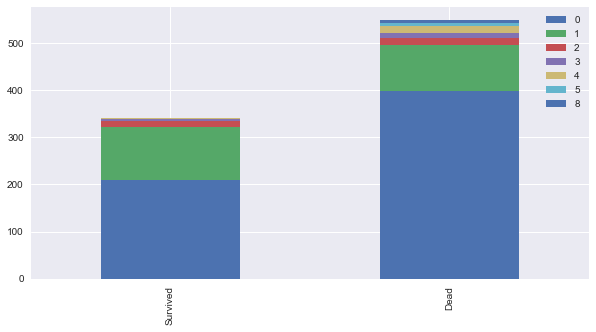

In [34]:
bar_chart('SibSp')

대체로 2명이상의 가족과 함께 탑승한 사람들은 생존할 가능성이 더 높다.(2,3,8)
혼자 탑승한 사람들은 죽을 가능성이 더 높다.

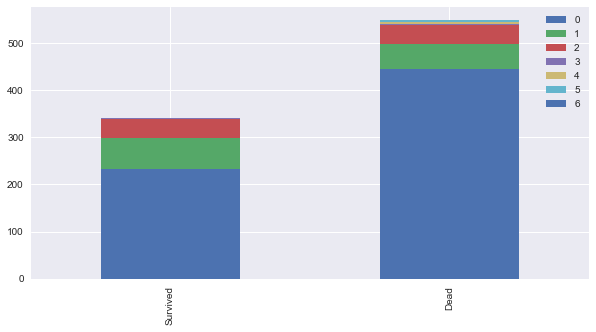

In [35]:
bar_chart('Parch')

2명 이상의 부모또는 아이가 있는 사람들이 생존할 가능성이 높다.
혼자 탑승한 사람들은 역시 죽을 가능성이 높다.

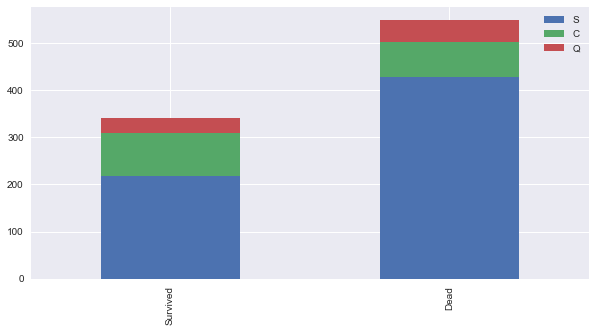

In [36]:
bar_chart('Embarked')

C선착장에서 탑승한 승객의 경우에는 생존할 가능성이 약간 더 높다. 
S선착장에서 탑승한 승객의 경우에는 죽을 가능성이 더 높다.
Q선착장에서 탑승한 승객의 경우에는 죽을 가능성이 더 높다. 

## 4. 특성 공학(특성 제어)

기계학습 알고리즘을 통해 없는 변수들을 새로 생성하거나 분석에 알맞은 변수들로 변환함

In [37]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### 4.1 어떻게 침몰했는가?
빙하에 부딫히면서 침몰했고 침몰과 함께 대피를 실행했다.
탑승석 등급에 따른 위치는 아래에 붉은색 노란색 흰색으로 표시가 되어 있다. 이 부분이 가장 생존과 관련되어 있다.

In [38]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

### 4.2 Name 부터 살펴봄
* Mrs 같은 경우 결혼한 여자에게 사용하기 때문에 주로 '아이와 여자부터 살리자!'로 아마 Mrs.의 생존율이 높을 것이다.

In [39]:
train.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [40]:
train_test_data = [train, test] # 훈련 데이터와 테스트 데이터 합침
# 데이터에 'Title'이라는 새로운 변수를 생성하고 Name에서 한단어가 영어대소문자로 되어있으며.으로 끝나는 부분만 추출함
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [41]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Jonkheer      1
Lady          1
Mme           1
Capt          1
Countess      1
Ms            1
Sir           1
Name: Title, dtype: int64

In [42]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

#### Title map
Mr : 0  
Miss : 1  
Mrs: 2  
Others: 3


In [43]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [44]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Title  
0      0         A/5 21171   7.2500   NaN        S      0  
1      0          PC 17599  71.2833   C85        C      2  
2      0  STON/O2. 3101282   7.9250   NaN        S      1  
3      0            113803  53.1000  C123        S      2  
4      0            373450   8.0500   NaN        S      0

In [45]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Title  
0  34.5      0      0   330911   7.8292   NaN        Q      0  
1  47.0      1      0   363272   7.0000   NaN        S      2  
2  62.0      0      0   240276   9.6875   NaN        Q      0  
3  27.0      0      0   315154   8.6625   NaN        S      0  
4  22.0      1      1  3101298  12.2875   NaN        S      2

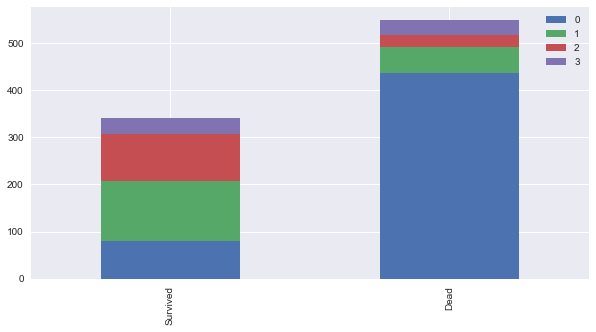

In [46]:
bar_chart('Title')
# 0 : Mr 1 : Miss 2 :Mrs
# 아래의 그림을 미루어보아 Miss와 Mrs가 생존할 가능성이 높다.

In [47]:
# 이름에 대해서 Title이라는 것으로 새로 생성했기 때문에 사용하기 힘든 Name을 삭제
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [48]:
train.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  Title  
0         A/5 21171   7.2500   NaN        S      0  
1          PC 17599  71.2833   C85        C      2  
2  STON/O2. 3101282   7.9250   NaN        S      1  
3            113803  53.1000  C123        S      2  
4            373450   8.0500   NaN        S      0

In [49]:
test.head()

PassengerId  Pclass     Sex   Age  SibSp  Parch   Ticket     Fare Cabin  \
0          892       3    male  34.5      0      0   330911   7.8292   NaN   
1          893       3  female  47.0      1      0   363272   7.0000   NaN   
2          894       2    male  62.0      0      0   240276   9.6875   NaN   
3          895       3    male  27.0      0      0   315154   8.6625   NaN   
4          896       3  female  22.0      1      1  3101298  12.2875   NaN   

  Embarked  Title  
0        Q      0  
1        S      2  
2        Q      0  
3        S      0  
4        S      2

### 4.3 Sex
기계학습 알고리즘에 적용하기 좋게 성별을 숫자로 변환하기
male: 0
female: 1

In [50]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

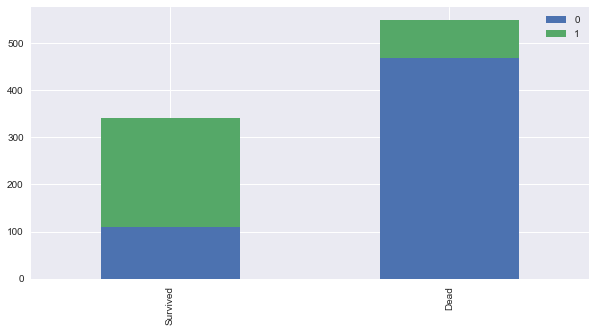

In [51]:
bar_chart('Sex')

### 4.4 Age

#### 4.4.1 빠진 정보들이 있음
빠진정보들을 각 그룹의 중앙 값으로 채울것임

In [52]:
train.head(100)

PassengerId  Survived  Pclass  Sex    Age  SibSp  Parch            Ticket  \
0             1         0       3    0  22.00      1      0         A/5 21171   
1             2         1       1    1  38.00      1      0          PC 17599   
2             3         1       3    1  26.00      0      0  STON/O2. 3101282   
3             4         1       1    1  35.00      1      0            113803   
4             5         0       3    0  35.00      0      0            373450   
5             6         0       3    0    NaN      0      0            330877   
6             7         0       1    0  54.00      0      0             17463   
7             8         0       3    0   2.00      3      1            349909   
8             9         1       3    1  27.00      0      2            347742   
9            10         1       2    1  14.00      1      0            237736   
10           11         1       3    1   4.00      1      1           PP 9549   
11           12         1       1    1  58.00      0      0            113783   
12           13         0       3    0  20.00      0      0         A/5. 2151   
13           14         0       3    0  39.00      1      5            347082   
14           15         0       3    1  14.00      0      0            350406   
15           16         1       2    1  55.00      0      0            248706   
16           17         0       3    0   2.00      4      1            382652   
17           18         1       2    0    NaN      0      0            244373   
18           19         0       3    1  31.00      1      0            345763   
19           20         1       3    1    NaN      0      0              2649   
20           21         0       2    0  35.00      0      0            239865   
21           22         1       2    0  34.00      0      0            248698   
22           23         1       3    1  15.00      0      0            330923   
23           24         1       1    0  28.00      0      0            113788   
24           25         0       3    1   8.00      3      1            349909   
25           26         1       3    1  38.00      1      5            347077   
26           27         0       3    0    NaN      0      0              2631   
27           28         0       1    0  19.00      3      2             19950   
28           29         1       3    1    NaN      0      0            330959   
29           30         0       3    0    NaN      0      0            349216   
..          ...       ...     ...  ...    ...    ...    ...               ...   
70           71         0       2    0  32.00      0      0        C.A. 33111   
71           72         0       3    1  16.00      5      2           CA 2144   
72           73         0       2    0  21.00      0      0      S.O.C. 14879   
73           74         0       3    0  26.00      1      0              2680   
74           75         1       3    0  32.00      0      0              1601   
75           76         0       3    0  25.00      0      0            348123   
76           77         0       3    0    NaN      0      0            349208   
77           78         0       3    0    NaN      0      0            374746   
78           79         1       2    0   0.83      0      2            248738   
79           80         1       3    1  30.00      0      0            364516   
80           81         0       3    0  22.00      0      0            345767   
81           82         1       3    0  29.00      0      0            345779   
82           83         1       3    1    NaN      0      0            330932   
83           84         0       1    0  28.00      0      0            113059   
84           85         1       2    1  17.00      0      0        SO/C 14885   
85           86         1       3    1  33.00      3      0           3101278   
86           87         0       3    0  16.00      1      3        W./C. 6608   
87           88         0       3  

In [53]:
# 사람의 Title(Mr, Mrs, Miss, Others)을 기반으로 각 그룹의 중앙 값을 구해서 비어있는 부분을 채움
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [54]:
train.head(30)
train.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
5      30.0
6      30.0
7       9.0
8      35.0
9      35.0
10     21.0
11     21.0
12     30.0
13     30.0
14     21.0
15     35.0
16      9.0
17     30.0
18     35.0
19     35.0
20     30.0
21     30.0
22     21.0
23     30.0
24     21.0
25     35.0
26     30.0
27     30.0
28     21.0
29     30.0
       ... 
861    30.0
862    35.0
863    21.0
864    30.0
865    35.0
866    21.0
867    30.0
868    30.0
869     9.0
870    30.0
871    35.0
872    30.0
873    30.0
874    35.0
875    21.0
876    30.0
877    30.0
878    30.0
879    35.0
880    35.0
881    30.0
882    21.0
883    30.0
884    30.0
885    35.0
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

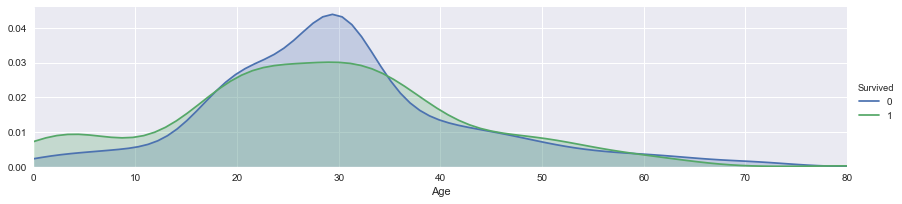

In [55]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show() 

(0, 20)

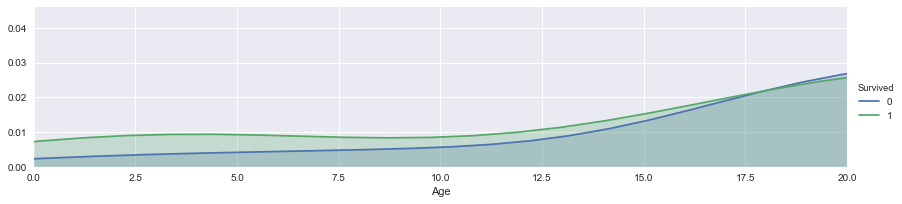

In [56]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

(20, 30)

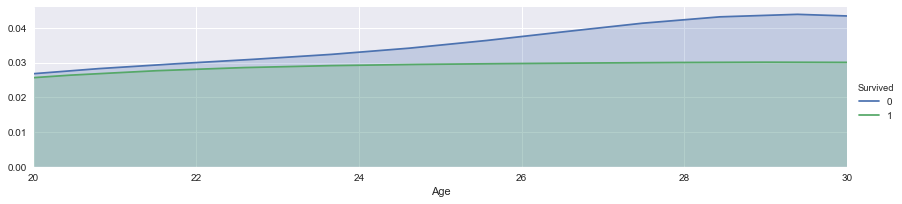

In [57]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

(30, 40)

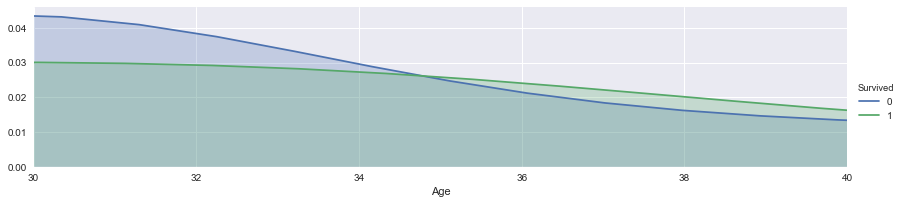

In [58]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

(40, 60)

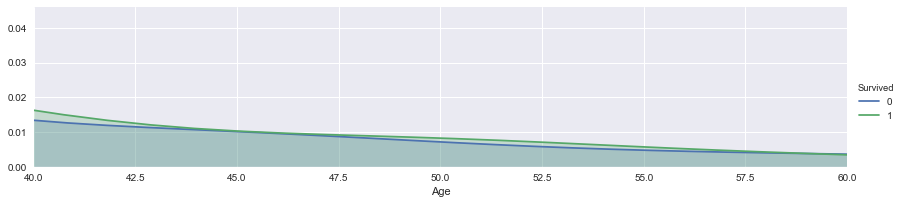

In [59]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

(40, 60)

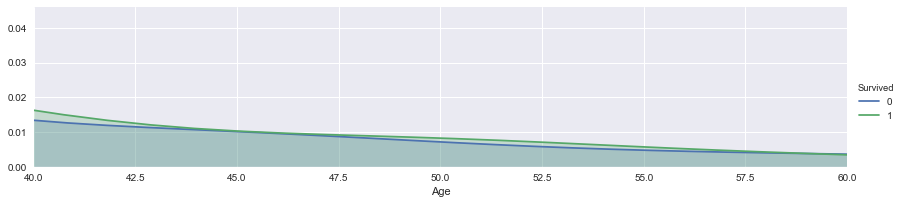

In [60]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

(60, 80.0)

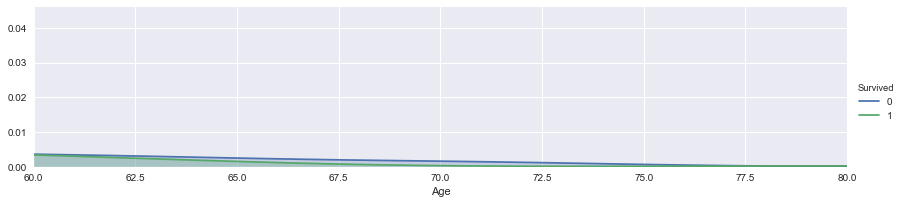

In [61]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(60)

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 73.1+ KB


In [63]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 31.1+ KB


#### 4.4.2 Binning
숫자 나이의 범위가 매우 넓기 때문에 그 정보를 4개의 카테고리로 분류함

feature vector map:  
child: 0  
young: 1  
adult: 2  
mid-age: 3  
senior: 4

In [64]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [65]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

      Fare Cabin Embarked  Title  
0   7.2500   NaN        S      0  
1  71.2833   C85        C      2  
2   7.9250   NaN        S      1  
3  53.1000  C123        S      2  
4   8.0500   NaN        S      0

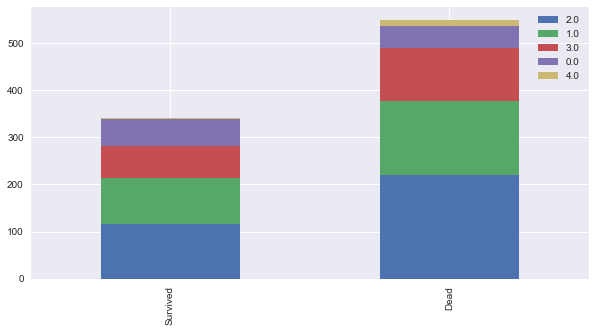

In [66]:
bar_chart('Age')

* child는 생존률이 높고
* young은 사망률이 높고
* adult는 사망률이 높고
* mid-age는 사망률이 높고
* senior 사망률이 높다
* 모두 상대적인 것이다.

### 4.5 Embarked(탑승한 항구)

#### 4.5.1 filling missing values

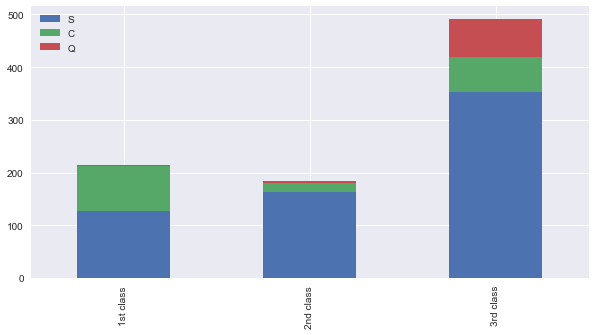

In [67]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

more than 50% of 1st class are from S embark  
more than 50% of 2nd class are from S embark  
more than 50% of 3rd class are from S embark
Q에서 탑승한 사람들은 2등, 3등석
S는 주로 모든 부분에서 많은 전체 데이터의 50퍼센트 이상을 차지하는 것으로 보임
**fill out missing embark with S embark**

In [68]:
#embarked 정보가 없으면 S로 채워라
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [69]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

      Fare Cabin Embarked  Title  
0   7.2500   NaN        S      0  
1  71.2833   C85        C      2  
2   7.9250   NaN        S      1  
3  53.1000  C123        S      2  
4   8.0500   NaN        S      0

In [70]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

### 4.6 Fare(티켓가격)

In [71]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0             1         0       3    0  1.0      1      0         A/5 21171   
1             2         1       1    1  3.0      1      0          PC 17599   
2             3         1       3    1  1.0      0      0  STON/O2. 3101282   
3             4         1       1    1  2.0      1      0            113803   
4             5         0       3    0  2.0      0      0            373450   
5             6         0       3    0  2.0      0      0            330877   
6             7         0       1    0  3.0      0      0             17463   
7             8         0       3    0  0.0      3      1            349909   
8             9         1       3    1  2.0      0      2            347742   
9            10         1       2    1  0.0      1      0            237736   
10           11         1       3    1  0.0      1      1           PP 9549   
11           12         1       1    1  3.0      0      0            113783   
12           13         0       3    0  1.0      0      0         A/5. 2151   
13           14         0       3    0  3.0      1      5            347082   
14           15         0       3    1  0.0      0      0            350406   
15           16         1       2    1  3.0      0      0            248706   
16           17         0       3    0  0.0      4      1            382652   
17           18         1       2    0  2.0      0      0            244373   
18           19         0       3    1  2.0      1      0            345763   
19           20         1       3    1  2.0      0      0              2649   
20           21         0       2    0  2.0      0      0            239865   
21           22         1       2    0  2.0      0      0            248698   
22           23         1       3    1  0.0      0      0            330923   
23           24         1       1    0  2.0      0      0            113788   
24           25         0       3    1  0.0      3      1            349909   
25           26         1       3    1  3.0      1      5            347077   
26           27         0       3    0  2.0      0      0              2631   
27           28         0       1    0  1.0      3      2             19950   
28           29         1       3    1  1.0      0      0            330959   
29           30         0       3    0  2.0      0      0            349216   
30           31         0       1    0  3.0      0      0          PC 17601   
31           32         1       1    1  2.0      1      0          PC 17569   
32           33         1       3    1  1.0      0      0            335677   
33           34         0       2    0  4.0      0      0        C.A. 24579   
34           35         0       1    0  2.0      1      0          PC 17604   
35           36         0       1    0  3.0      1      0            113789   
36           37         1       3    0  2.0      0      0              2677   
37           38         0       3    0  1.0      0      0        A./5. 2152   
38           39         0       3    1  1.0      2      0            345764   
39           40         1       3    1  0.0      1      0              2651   
40           41         0       3    1  3.0      1      0              7546   
41           42         0       2    1  2.0      1      0             11668   
42           43         0       3    0  2.0      0      0            349253   
43           44         1       2    1  0.0      1      2     SC/Paris 2123   
44           45         1       3    1  1.0      0      0            330958   
45           46         0       3    0  2.0      0      0   S.C./A.4. 23567   
46           47         0       3    0  2.0      1      0            370371   
47           48         1       3    1  1.0      0      0             14311   
48           49         0       3    0  2.0      2      0              2662   
49           50         0       3    1  1.0      1    

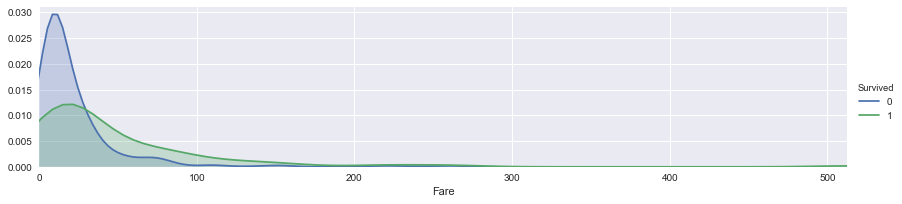

In [72]:
# 티켓가격이 싼 것을 산 사람들은 사망률이 높다.비싼 티켓은 좀더 많이 사는 것을 볼 수 있다.
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.show()


(0, 20)

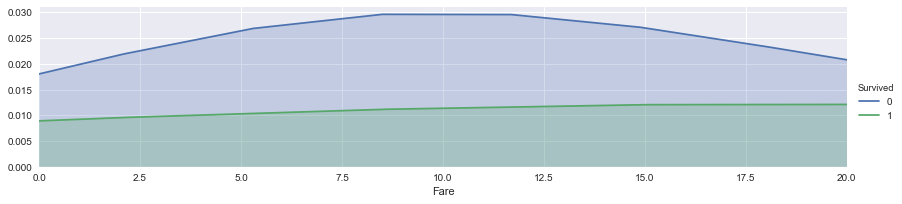

In [73]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

(0, 30)

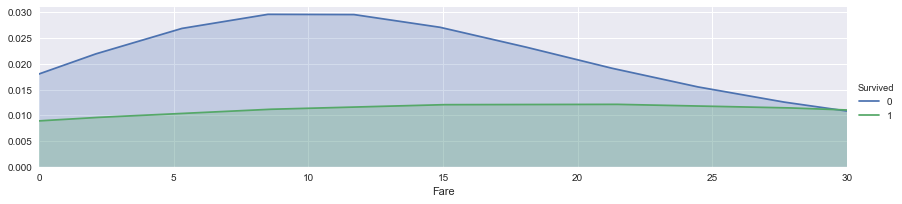

In [74]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

(0, 512.3292)

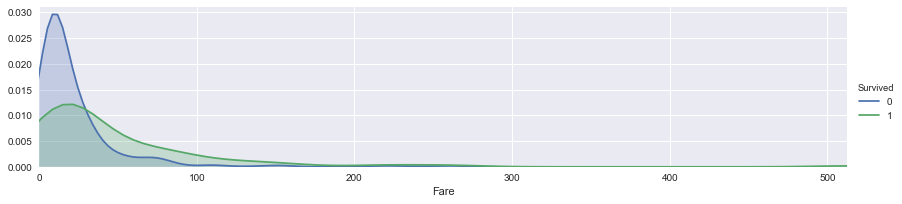

In [75]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0)

* 17 이하는 0
* 17~30이하는 1
* 30~100이하는 2
* 100이상은 3

In [76]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [77]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

   Fare Cabin  Embarked  Title  
0   0.0   NaN         0      0  
1   2.0   C85         1      2  
2   0.0   NaN         0      1  
3   2.0  C123         0      2  
4   0.0   NaN         0      0

### 4.7 Cabin(방등급)
*  알파벳으로 시작, 숫자

In [78]:
train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
E101           3
C22 C26        3
F2             3
D              3
F33            3
B58 B60        2
D26            2
E24            2
E67            2
D36            2
B35            2
B22            2
B28            2
D20            2
C124           2
B49            2
F G73          2
C2             2
E8             2
E121           2
B18            2
B51 B53 B55    2
C92            2
B20            2
F4             2
C126           2
E44            2
              ..
E10            1
E58            1
B4             1
B71            1
C111           1
E50            1
D15            1
D9             1
B41            1
F38            1
A36            1
C110           1
C70            1
C101           1
B94            1
A34            1
C45            1
E38            1
D47            1
A6             1
C104           1
A26            1
D48            1
F E69          1
A10            1
E68            1
B42            1
A23           

In [79]:
#첫번쨰 문자만을 사용하여 구분
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

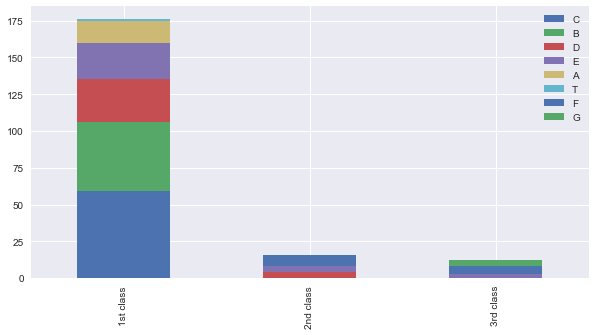

In [80]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

* ABCDE 방만 1등급에 존재함을 확인할 수 있음

* Machine Learning classifier를 사용하기 위해서 수치형으로 변환
* Feature scaling

In [81]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [82]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

### 4.8 FamilySize(가족의 크기)

In [83]:
#부모와 아이의 수를 모두 합해서 하나의 변수로 통합함
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0, 11.0)

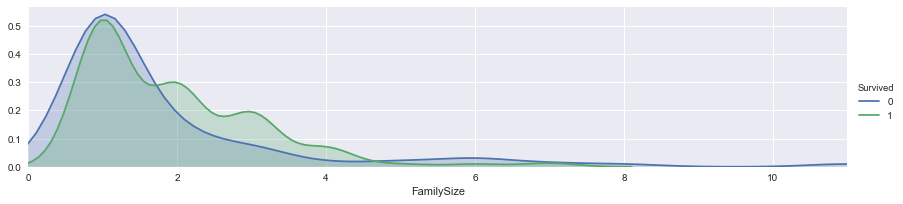

In [84]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [85]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [86]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

   Fare  Cabin  Embarked  Title  FamilySize  
0   0.0    2.0         0      0         0.4  
1   2.0    0.8         1      2         0.4  
2   0.0    2.0         0      1         0.0  
3   2.0    0.8         0      2         0.4  
4   0.0    2.0         0      0         0.0

In [87]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

   Fare  Cabin  Embarked  Title  FamilySize  
0   0.0    2.0         0      0         0.4  
1   2.0    0.8         1      2         0.4  
2   0.0    2.0         0      1         0.0  
3   2.0    0.8         0      2         0.4  
4   0.0    2.0         0      0         0.0

* Ticket과 합친 데이터를 삭제함

In [88]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [73]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [74]:
train_data.head(10)

Pclass  Sex  Age  Fare  Cabin  Embarked  Title  FamilySize
0       3    0  1.0   0.0    2.0         0      0         0.4
1       1    1  3.0   2.0    0.8         1      2         0.4
2       3    1  1.0   0.0    2.0         0      1         0.0
3       1    1  2.0   2.0    0.8         0      2         0.4
4       3    0  2.0   0.0    2.0         0      0         0.0
5       3    0  2.0   0.0    2.0         2      0         0.0
6       1    0  3.0   2.0    1.6         0      0         0.0
7       3    0  0.0   1.0    2.0         0      3         1.6
8       3    1  2.0   0.0    2.0         0      2         0.8
9       2    1  0.0   2.0    1.8         1      2         0.4

In [75]:
test

PassengerId  Pclass  Sex  Age  Fare  Cabin  Embarked  Title  FamilySize
0            892       3    0  2.0   0.0    2.0         2      0         0.0
1            893       3    1  3.0   0.0    2.0         0      2         0.4
2            894       2    0  3.0   0.0    2.0         2      0         0.0
3            895       3    0  2.0   0.0    2.0         0      0         0.0
4            896       3    1  1.0   0.0    2.0         0      2         0.8
5            897       3    0  0.0   0.0    2.0         0      0         0.0
6            898       3    1  2.0   0.0    2.0         2      1         0.0
7            899       2    0  1.0   1.0    2.0         0      0         0.8
8            900       3    1  1.0   0.0    2.0         1      2         0.0
9            901       3    0  1.0   1.0    2.0         0      0         0.8
10           902       3    0  2.0   0.0    2.0         0      0         0.0
11           903       1    0  3.0   1.0    0.8         0      0         0.0
12           904       1    1  1.0   2.0    0.4         0      2         0.4
13           905       2    0  4.0   1.0    2.0         0      0         0.4
14           906       1    1  3.0   2.0    1.6         0      2         0.4
15           907       2    1  1.0   1.0    2.0         1      2         0.4
16           908       2    0  2.0   0.0    2.0         2      0         0.0
17           909       3    0  1.0   0.0    2.0         1      0         0.0
18           910       3    1  2.0   0.0    2.0         0      1         0.4
19           911       3    1  3.0   0.0    2.0         1      2         0.0
20           912       1    0  3.0   2.0    0.8         1      0         0.4
21           913       3    0  0.0   0.0    2.0         0      3         0.4
22           914       1    1  3.0   2.0    0.8         0      2         0.0
23           915       1    0  1.0   2.0    0.8         1      0         0.4
24           916       1    1  3.0   3.0    0.4         1      2         1.6
25           917       3    0  3.0   0.0    2.0         0      0         0.4
26           918       1    1  1.0   2.0    0.4         1      1         0.4
27           919       3    0  1.0   0.0    2.0         1      0         0.0
28           920       1    0  3.0   2.0    0.0         0      0         0.0
29           921       3    0  2.0   1.0    2.0         1      0         0.8
..           ...     ...  ...  ...   ...    ...       ...    ...         ...
388         1280       3    0  1.0   0.0    2.0         2      0         0.0
389         1281       3    0  0.0   1.0    2.0         0      3         1.6
390         1282       1    0  1.0   2.0    0.4         0      0         0.0
391         1283       1    1  3.0   2.0    1.2         0      2         0.4
392         1284       3    0  0.0   1.0    2.0         0      3         0.8
393         1285       2    0  3.0   0.0    2.0         0      0         0.0
394         1286       3    0  2.0   1.0    2.0         0      0         1.6
395         1287       1    1  1.0   2.0    0.8         0      2         0.4
396         1288       3    0  1.0   0.0    2.0         2      0         0.0
397         1289       1    1  3.0   2.0    0.4         1      2         0.8
398         1290       3    0  1.0   0.0    2.0         0      0         0.0
399         1291       3    0  2.0   0.0    2.0         2      0         0.0
400         1292       1    1  2.0   3.0    0.8         0      1         0.0
401         1293       2    0  3.0   1.0    2.0         0      0         0.4
402         1294       1    1  1.0   2.0    0.8         1      1         0.4
403         1295       1    0  1.0   2.0    0.8         0      0         0.0
404         1296       1    0  3.0   1.0    1.2         1      0         0.4
405         1297       2    0  1.0   0.0    1.2         1      0         0.0
406         1298       2    0  1.0   0.0    2.0         0      0         0.4
407         1299       1    0  3.0   3.0    0.8         1      0         0.8
4

## 5. Modelling

In [83]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(5)
memory usage: 62.7 KB


### 6.2 Cross Validation (K-fold)

![k-foldimage](images/k-fold.JPG)

![kfoldimage2](images/kfold2.JPG)

In [85]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### 6.2.1 kNN

![knnimage](images/knn3.JPG)

![knnimage](images/knn5.JPG)

In [86]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[ 0.82222222  0.76404494  0.80898876  0.83146067  0.87640449  0.82022472
  0.85393258  0.79775281  0.84269663  0.84269663]


In [87]:
# kNN Score
round(np.mean(score)*100, 2)

82.599999999999994

### 6.2.2 Decision Tree

![decisionimage](images/decisiontree.JPG)

In [88]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[ 0.76666667  0.83146067  0.76404494  0.7752809   0.88764045  0.75280899
  0.82022472  0.82022472  0.74157303  0.78651685]


In [89]:
# decision tree Score
round(np.mean(score)*100, 2)

79.459999999999994

### 6.2.3 Ramdom Forest

![randomforestimage](images/randomforest.JPG)

In [90]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[ 0.78888889  0.83146067  0.78651685  0.79775281  0.84269663  0.79775281
  0.80898876  0.83146067  0.7752809   0.82022472]


In [91]:
# Random Forest Score
round(np.mean(score)*100, 2)

80.810000000000002

### 6.2.5 SVM

![svmimage](images/svm.JPG)

In [92]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[ 0.83333333  0.80898876  0.83146067  0.82022472  0.84269663  0.82022472
  0.84269663  0.85393258  0.83146067  0.86516854]


In [93]:
round(np.mean(score)*100,2)

83.5

## 7. Testing

In [87]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [88]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [89]:
submission = pd.read_csv('submission.csv')
submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

## References

This notebook is created by learning from the following notebooks:

- [Mukesh ChapagainTitanic Solution: A Beginner's Guide](https://www.kaggle.com/chapagain/titanic-solution-a-beginner-s-guide?scriptVersionId=1473689)
- [How to score 0.8134 in Titanic Kaggle Challenge](http://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html)
- [Titanic: factors to survive](https://olegleyz.github.io/titanic_factors.html)
- [Titanic Survivors Dataset and Data Wrangling](http://www.codeastar.com/data-wrangling/)
